## PREDICTIVE ANALYSIS FOR CUSTOMER CHURN IN A TELECOMUNICATION ORGANIZATION

#### OVERVIEW

A major telecommunications company is experiencing customer churn, where customers are discontinuing their services at a significant rate. Understanding the drivers behind customer churn is essential for improving customer retention and maintaining profitability.
The company has collected historical data on its customers, including demographic information, service subscription details, billing information, and churn status. The goal is to analyze this data to identify patterns and predictors of churn and to develop a machine learning model that can accurately predict whether a customer is likely to churn.
By doing so, the organization can proactively target at-risk customers with tailored retention strategies, ultimately reducing churn and improving customer satisfaction.

#### FEATURES

Customer Info: customerID, gender, SeniorCitizen, Partner, Dependents, tenure

Services Subscribed: PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, etc.

Account Info: Contract, PaymentMethod, PaperlessBilling, MonthlyCharges, TotalCharges

Target Variable: Churn (Yes/No) — whether the customer left the company

#### PROBLEM STATEMENT

The telecom company wants to predict which customers are likely to churn (i.e. leave the service), so that it can take proactive measures to retain them.

#### PROJECT AIM

The aim of this project is to analyze the customer data from the telecommunications company and to develop a predictive model that accurately identifies customers who are at risk of churning.
By leveraging machine learning and data analytics, the project seeks to provide actionable insights that will help the company improve customer retention, optimize marketing efforts, and reduce revenue loss due to churn.

In [166]:
!pip install xgboost



In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder       # convert from categorical to numerical
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score
import joblib
import warnings
warnings.filterwarnings('ignore')


In [145]:
data = pd.read_csv("Telco-Customer-Churn.csv")

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [146]:
#Summary Statistics on the dataset
data.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [147]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [148]:
# changing datatype for total charges

data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors = 'coerce')

data.dtypes

# changing datatypes

categorical_columns = ['gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for column in categorical_columns:
    data[column] = data[column].astype('category')
    


In [149]:
#checking for missing values

data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [150]:
data = data.dropna()

In [151]:
# Encode categorical variables
categorical_cols = ["PhoneService", "MultipleLines", 'InternetService', "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
                    "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Dependents", "Partner", "gender", "customerID", "Churn"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col]) 
    label_encoders[col] = le 

#### VISUALIZATIONS

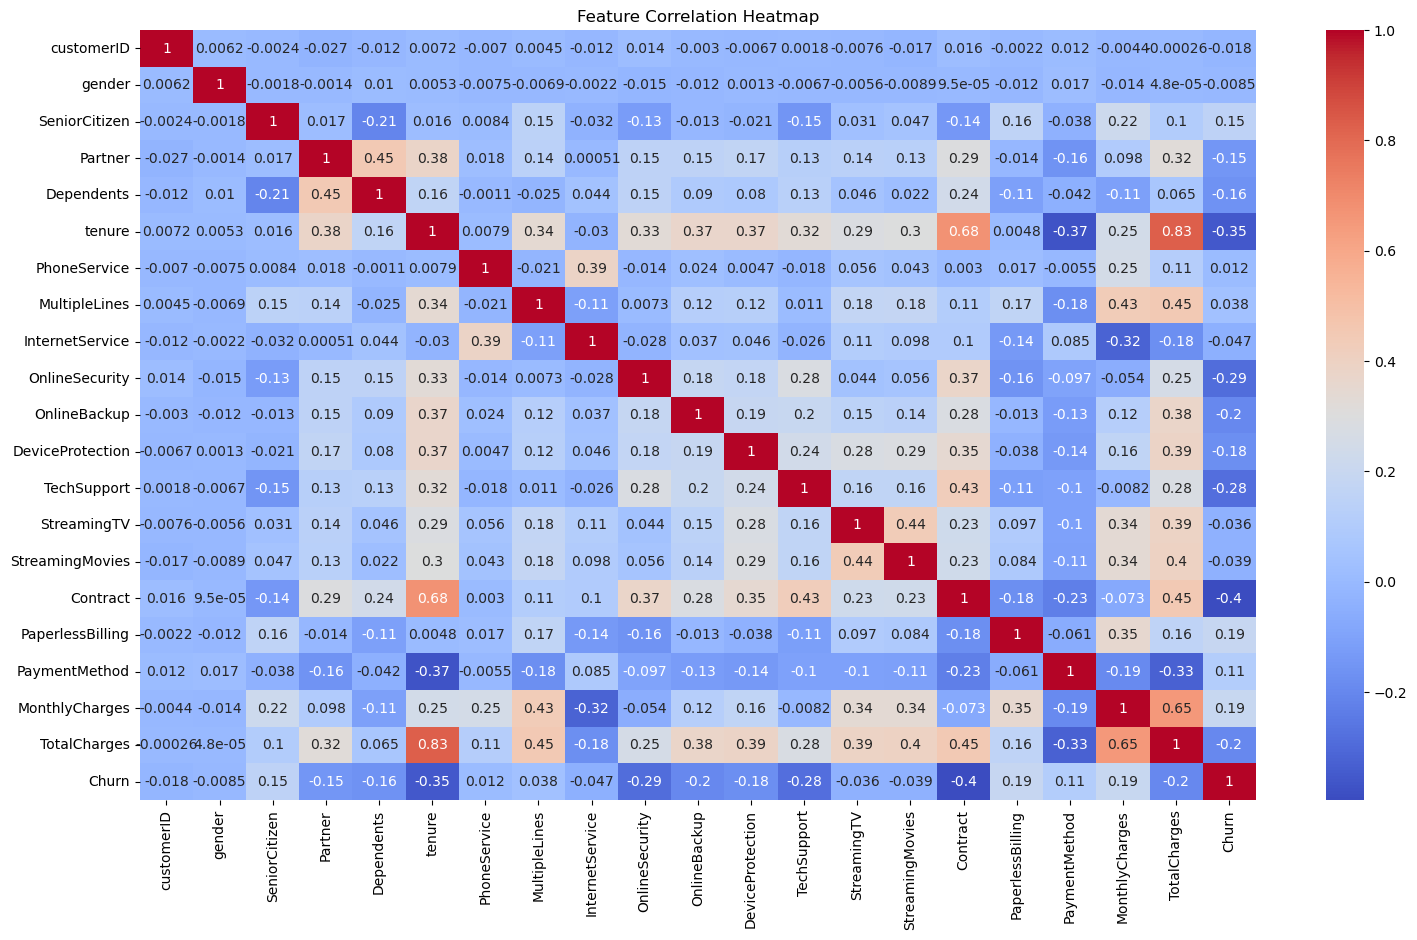

In [152]:
# Correlation Heatmap
plt.figure(figsize=(18,10))    # dimension of the visual
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')   ## correlation shown in a heatmap, annot = true shows the values
plt.title('Feature Correlation Heatmap')

plt.show()

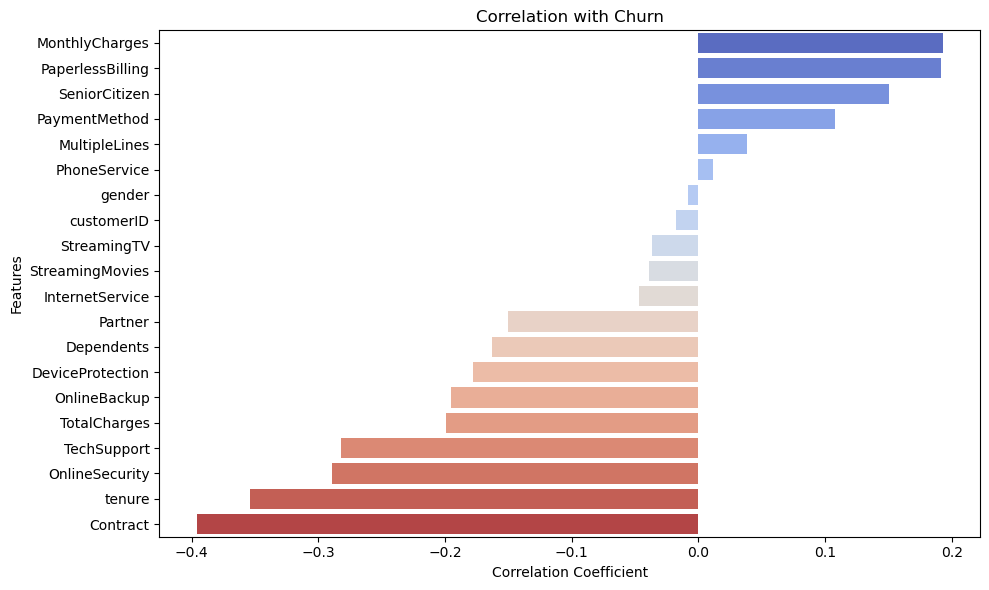

<Figure size 640x480 with 0 Axes>

In [153]:
# Correlation with churn
correlation = data.corr()['Churn'].sort_values(ascending=False).drop('Churn')

plt.figure(figsize=(10,6))
sns.barplot(
    x=correlation.values,
    y=correlation.index,
    hue=correlation.index,
    palette='coolwarm',
    dodge=False,
    legend=False
)
plt.title("Correlation with Churn")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
plt.savefig('correlation.png')


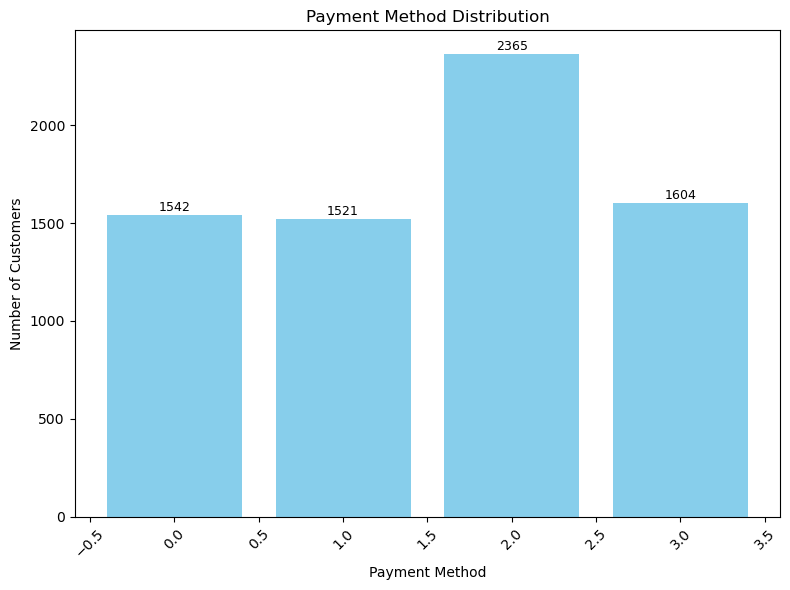

In [154]:
# Create pie chart
paymentmethod_counts = data["PaymentMethod"].value_counts()
plt.figure(figsize=(8, 6))
bars = plt.bar(paymentmethod_counts.index, paymentmethod_counts.values, color='skyblue')
plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)  # Rotate labels for better readability
# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5,  # +5 to place it above the bar
             int(yval), ha='center', va='bottom', fontsize=9)
plt.tight_layout()  # Adjust layout to prevent cutoff
plt.savefig('bar_chart.png')  # saves as an image
plt.show()

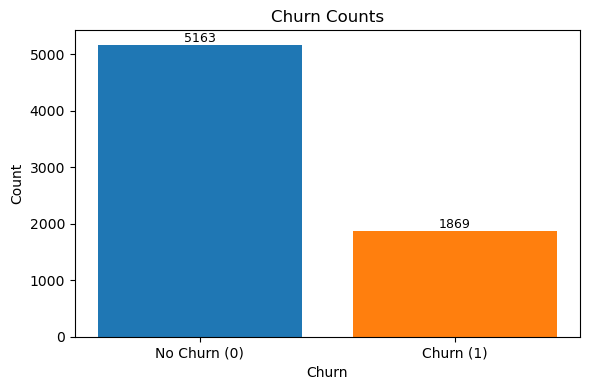

In [155]:
## distribution of churns
churn_counts = data['Churn'].value_counts()

plt.figure(figsize=(6, 4))
bars = plt.bar(churn_counts.index.astype(str), churn_counts.values, color=['#1f77b4', '#ff7f0e'])
plt.title("Churn Counts")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['No Churn (0)', 'Churn (1)'])
# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5,  # +5 to place it above the bar
             int(yval), ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

#### MACHINE LEARNING

In [189]:
# Define Features and Target
# dividing the table into features and column, feature is what u feed the machine with X, and target is the output you want,Y.
X = data.drop('Churn', axis=1)  ##the feature
y = data['Churn']  ## the target


#### SPLITTING THE DATA

In [190]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
#X_train = X_train.reset_index(drop=True)
#X_test = X_test.reset_index(drop=True)

X_train = X_train.drop(columns=['customerID'])  # Before fitting the model
X_test = X_test.drop(columns=['customerID'])

#### TRAINING MODELS

In [158]:
# model = LogisticRegression()
# model.fit(X_train, y_train)
# log_predictions = model.predict(X_test)

# print("Logistic Regression")
# print("Report:\n", classification_report(y_test, log_predictions))
# print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# # 2. Decision Tree
# tree = DecisionTreeClassifier(max_depth=5, random_state=42)
# tree.fit(X_train, y_train)
# y_pred_tree = tree.predict(X_test)

# print(" Decision Tree")
# print(classification_report(y_test, y_pred_tree))
# print("ROC-AUC:", roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]))


# # 3. Random Forest
# forest = RandomForestClassifier(n_estimators=500, random_state=42)
# forest.fit(X_train, y_train)
# y_pred_forest = forest.predict(X_test)

# print(" Random Forest")
# print(classification_report(y_test, y_pred_forest))
# print("ROC-AUC:", roc_auc_score(y_test, forest.predict_proba(X_test)[:,1]))

# # 4. XGBoost
# xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# xgboost.fit(X_train, y_train)
# y_pred_xgboost = xgboost.predict(X_test)

# print(" XGBoost")
# print(classification_report(y_test, y_pred_xgboost))
# print("ROC-AUC:", roc_auc_score(y_test, xgboost.predict_proba(X_test)[:,1]))

Logistic Regression
Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1549
           1       0.62      0.55      0.58       561

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110

ROC-AUC: 0.8324092710034304
 Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1549
           1       0.64      0.38      0.48       561

    accuracy                           0.78      2110
   macro avg       0.72      0.65      0.67      2110
weighted avg       0.76      0.78      0.76      2110

ROC-AUC: 0.8066235591014385
 Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg 

#### FEATURE ENGINEERING AND MODEL TUNING

In [191]:
selected_columns = ["PhoneService", "PaperlessBilling", "Contract","InternetService", "tenure", "Dependents", "PaymentMethod","MonthlyCharges"]

X_train = X_train[selected_columns]

X_test = X_test[selected_columns]

In [192]:

model = LogisticRegression()
model.fit(X_train, y_train)
log_predictions = model.predict(X_test)

print("Logistic Regression")
print("Report:\n", classification_report(y_test, log_predictions))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


# 2. Decision Tree
tree = DecisionTreeClassifier(max_depth=10, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print(" Decision Tree")
print(classification_report(y_test, y_pred_tree))
print("ROC-AUC:", roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]))


# 3. Random Forest
forest = RandomForestClassifier(n_estimators=700, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

print(" Random Forest")
print(classification_report(y_test, y_pred_forest))
print("ROC-AUC:", roc_auc_score(y_test, forest.predict_proba(X_test)[:,1]))

# 4. XGBoost
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost.fit(X_train, y_train)
y_pred_xgboost = xgboost.predict(X_test)

print(" XGBoost")
print(classification_report(y_test, y_pred_xgboost))
print("ROC-AUC:", roc_auc_score(y_test, xgboost.predict_proba(X_test)[:,1]))

Logistic Regression
Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.50      0.56       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

ROC-AUC: 0.8284074942260489
 Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1549
           1       0.54      0.49      0.51       561

    accuracy                           0.75      2110
   macro avg       0.68      0.67      0.67      2110
weighted avg       0.75      0.75      0.75      2110

ROC-AUC: 0.7454944769151277
 Random Forest
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1549
           1       0.56      0.48      0.52       561

    accuracy                           0.76      2110
   macro avg 

#### MODEL TUNING USING SMOTE

In [175]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# y_train_resampled = y_train_resampled.squeeze()


# # Train model
# model = LogisticRegression()
# model.fit(X_train_resampled, y_train_resampled)

# # Evaluate
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))
# print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# ###retraining decision tree using SMOTE
# tree = DecisionTreeClassifier(max_depth=5, random_state=42)

# tree.fit(X_train_resampled, y_train_resampled)

# y_pred_tree = tree.predict(X_test)

# print(" Decision Tree")
# print(classification_report(y_test, y_pred_tree))
# print("ROC-AUC:", roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]))

# ###retraining RANDOM FOREST using SMOTE

# forest = RandomForestClassifier(n_estimators=700, random_state=42, class_weight = 'balanced')

# forest.fit(X_train_resampled, y_train_resampled)

# y_pred_forest = forest.predict(X_test)

# print(" Random Forest")
# print(classification_report(y_test, y_pred_forest))
# print("ROC-AUC:", roc_auc_score(y_test, forest.predict_proba(X_test)[:,1]))

# # 4. XGBoost
# # xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# xgboost = XGBClassifier(
#     use_label_encoder=False,
#     eval_metric='logloss',
#     n_estimators=500,
#     max_depth=5,
#     learning_rate=0.1,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     gamma=1,
#     reg_alpha=0.01,
#     reg_lambda=1,
#     scale_pos_weight=1  # Change this for imbalance
# )
# xgboost.fit(X_train_resampled, y_train_resampled)
# y_pred_xgboost = xgboost.predict(X_test)

# print(" XGBoost")
# print(classification_report(y_test, y_pred_xgboost))
# print("ROC-AUC:", roc_auc_score(y_test, xgboost.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1549
           1       0.48      0.76      0.59       561

    accuracy                           0.72      2110
   macro avg       0.69      0.73      0.69      2110
weighted avg       0.78      0.72      0.73      2110

ROC-AUC: 0.8170782368936776
 Decision Tree
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1549
           1       0.46      0.80      0.59       561

    accuracy                           0.70      2110
   macro avg       0.68      0.73      0.67      2110
weighted avg       0.79      0.70      0.72      2110

ROC-AUC: 0.8070424366706599
 Random Forest
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1549
           1       0.51      0.62      0.56       561

    accuracy                           0.74      2110
   macro avg       0.68      0.70      0.6

#### SAVING BEST MODEL


In [193]:

# Save the model
joblib.dump(model, 'model.pkl')



['model.pkl']